In [1]:
import sys
sys.path.append("../") # go to parent dir

import matplotlib.pyplot as plt
import numpy as np
from toolbox.proj1_helpers import *
from toolbox.implement import *

%load_ext autoreload
%autoreload 2

In [2]:
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
ind_DER_mass_MMC = 0
ind_DER_mass_transverse_met_lep = 1
ind_DER_mass_vis = 2
ind_DER_pt_h   = 3
ind_DER_deltaeta_jet_jet = 4
ind_DER_mass_jet_jet = 5
ind_DER_prodeta_jet_jet = 6
ind_DER_deltar_tau_lep = 7
ind_DER_pt_tot   = 8
ind_DER_sum_pt   = 9
ind_DER_pt_ratio_lep_tau   = 10
ind_DER_met_phi_centrality   = 11
ind_DER_lep_eta_centrality   = 12
ind_PRI_tau_pt   = 13
ind_PRI_tau_eta   = 14
ind_PRI_tau_phi   = 15
ind_PRI_lep_pt   = 16
ind_PRI_lep_eta = 17
ind_PRI_lep_phi = 18
ind_PRI_met   = 19
ind_PRI_met_phi   = 20
ind_PRI_met_sumet   = 21
ind_PRI_jet_num   = 22
ind_PRI_jet_leading_pt   = 23
ind_PRI_jet_leading_eta   = 24
ind_PRI_jet_leading_phi   = 25
ind_PRI_jet_subleading_pt   = 26
ind_PRI_jet_subleading_eta   = 27
ind_PRI_jet_subleading_phi   = 28
ind_PRI_jet_all_pt   = 29



Step 1 : Correct the values for jet_num = 2 // All the values in DER_mass_MMC = -999.000
We correct them by extracting the correct values in this column (which is DER_mass_MMC)
And train a model to predict the value of this column using the values from the other parameters

Task 1 from this step : Extract and store in proper way, in order to have a 
- 'y' vector containing the right values of DER_mass_MMC
- 'x' matrix containing the others columns from the right values of DER_mass_MMC (associated to y)
- 'wrongX_topredict' containing the parameters from the wrong values of DER_mass_MMC 

We will then train the model using y and x, and then compute this trained model with wrongX_topredict in order to have some approx. correct values and replace all the -999.000

In [4]:
# Extract indices from dataset only jet_num = 0 // ravel() is used to transform into a single vector the indices
ind_jet0 = np.argwhere((tX[:,ind_PRI_jet_num] == 0)).ravel()

# Create new dataset extracting only jet_num = 0
datajet0 = tX[ind_jet0]
colToDelete_jet0 = [ind_PRI_jet_num,ind_DER_deltaeta_jet_jet, ind_DER_mass_jet_jet, ind_DER_prodeta_jet_jet, ind_DER_lep_eta_centrality, ind_PRI_jet_subleading_pt, ind_PRI_jet_subleading_eta, ind_PRI_jet_subleading_phi, ind_PRI_jet_leading_pt, ind_PRI_jet_leading_eta, ind_PRI_jet_leading_phi, ind_PRI_jet_all_pt]     
datajet0 = np.delete(datajet0, colToDelete_jet0 , axis=1)
print(datajet0.min(axis=0))
# Now we want to extract and correct -999.000 values from DER_mass_MMC

print("Length of Jet_num = 0 : " +str(datajet0[:,ind_DER_mass_MMC].shape))

# Extract indices where the wrong value of DER_mass_MMC == -999.000 // We want to correct/predict these values
ind_wrongjet0 = np.argwhere(datajet0[:,ind_DER_mass_MMC] == -999.000).ravel()
print(ind_wrongjet0)

# Extract indices where the values of DER_mass_MMC are correct // We will train from these datas
ind_rightjet0 = np.argwhere(datajet0[:,ind_DER_mass_MMC] != -999.000).ravel()
print(ind_rightjet0)

# Extract data DER_mass_MMC only wrong values
wrongjet0 = datajet0[ind_wrongjet0]
print(wrongjet0.shape)

#Create the data that will compute the predicted y (DER_mass_MMC)
tx_wrongjet0 = np.delete(wrongjet0, ind_DER_mass_MMC, axis=1)
print(tx_wrongjet0.shape)


# Extract data DER_mass_MMC only correct values
rightjet0 = datajet0[ind_rightjet0]
print(rightjet0.shape)
#Now we'll extract the DER_mass_MMC column and turn it into a 'y' vector sample,
# The others columns will be the 'X' data samples
y_rightjet0 = rightjet0[:, ind_DER_mass_MMC]
print(y_rightjet0.shape)
tx_rightjet0 = np.delete(rightjet0, ind_DER_mass_MMC, axis=1)
print(tx_rightjet0.shape)

[-9.9900e+02  2.0000e-03  7.1200e+00  0.0000e+00  2.7700e-01  0.0000e+00
  4.6104e+01  1.2700e-01 -1.4140e+00  2.0000e+01 -2.4990e+00 -3.1420e+00
  2.6000e+01 -2.5050e+00 -3.1420e+00  1.0900e-01 -3.1420e+00  1.3678e+01]
Length of Jet_num = 0 : (99913,)
[    3     5     8 ... 99909 99910 99912]
[    0     1     2 ... 99907 99908 99911]
(26123, 18)
(26123, 17)
(73790, 18)
(73790,)
(73790, 17)


Now that we have the data we will train the model

In [5]:
from toolbox.implement import *
from toolbox.cross_validation import *
import matplotlib.pyplot as plt

In [6]:
#best_degree_selection(y_rightjet3,tx_rightjet3, np.arange(1,11), 5, np.logspace(-4, 0, 30), seed = 2)

# Best degree : 2 / Best lambda : 0.00013738237958832623

In [7]:
len(tx_rightjet0)

73790

0.024841952329978944
[143.905 175.864 105.594 ... 164.31  127.822  94.951]
[ 0.30101157  1.11096083  0.01882488 ...  1.05848731  0.43769641
 -0.24731649]


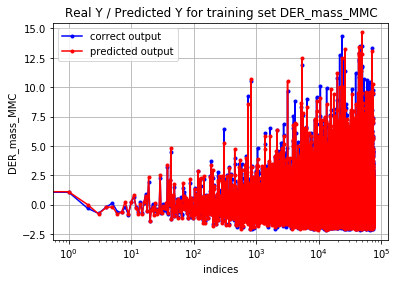

In [8]:
tx_rightjet0_poly = build_poly(tx_rightjet0, 2, False)
tx_rightjet0_poly,mean_txjet0,std_txjet0 = standardize(tx_rightjet0_poly)
tx_rightjet0_poly[:,0] = np.ones(len(tx_rightjet0_poly)) ####### ADD to FUNCTION
stand_y_rightjet0,mean_yjet0,std_yjet0 = standardize(y_rightjet0)

loss, w_jet0 = ridge_regression(stand_y_rightjet0, tx_rightjet0_poly, 0.00013738237958832623)
print(loss)


y_pred = tx_rightjet0_poly.dot(w_jet0)
print(y_rightjet0)
print(y_pred)


plt.semilogx(np.arange(y_pred.shape[0]), stand_y_rightjet0, marker=".", color='b', label='correct output')
plt.semilogx(np.arange(y_pred.shape[0]), y_pred, marker=".", color='r', label='predicted output')
plt.xlabel("indices")
plt.ylabel("DER_mass_MMC")
plt.title("Real Y / Predicted Y for training set DER_mass_MMC")
plt.legend(loc=2)
plt.grid(True)

#cross_validation_demo(y_rightjet3,tx_rightjet3, 2, 5)

The model is trained so we will now compute/predict the values for the wrong ones.

[0.00000000e+00 2.91923397e+01 3.51575162e+01 1.77650339e+01
 4.96403587e-01 1.77650339e+01 2.26578965e+01 5.73863983e-01
 1.04761360e+00 1.45867606e+01 1.22306217e+00 1.81618810e+00
 1.42313670e+01 1.29174406e+00 1.81594632e+00 1.62567103e+01
 1.81313065e+00 5.28348188e+01 3.56488131e+03 1.06345237e+04
 2.95944856e+04 2.80931351e+00 2.95944856e+04 5.36635468e+03
 1.90149411e+00 4.91128079e-01 1.72102060e+03 1.60159523e+00
 2.95595919e+00 1.68068610e+03 1.66655031e+00 2.95768897e+00
 2.97544771e+04 2.94359168e+00 1.69436307e+04]


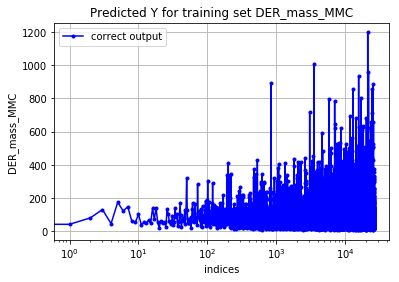

In [9]:
print(std_txjet0)
tx_wrongjet0_poly = build_poly(tx_wrongjet0, 2, False)
tx_wrongjet0_poly,_,_ = standardize(tx_wrongjet0_poly,mean_txjet0,std_txjet0)

tx_wrongjet0_poly[:,0] = np.ones(len(tx_wrongjet0_poly)) ####### ADD to FUNCTION
#tx_wrongjet0_poly,_,_ = standardize(tx_wrongjet0_poly)

y_pred = tx_wrongjet0_poly.dot(w_jet0)

y_pred = (y_pred*std_yjet0) + mean_yjet0


plt.semilogx(np.arange(y_pred.shape[0]), y_pred, marker=".", color='b', label='correct output')
plt.xlabel("indices")
plt.ylabel("DER_mass_MMC")
plt.title("Predicted Y for training set DER_mass_MMC")
plt.legend(loc=2)
plt.grid(True)

We will now correct the initial dataset.

In [10]:
wrongjet0[:, ind_DER_mass_MMC] = y_pred

datajet0[ind_wrongjet0] = wrongjet0

datajet0.min(axis=0)

array([ 8.16872814e+00,  2.00000000e-03,  7.12000000e+00,  0.00000000e+00,
        2.77000000e-01,  0.00000000e+00,  4.61040000e+01,  1.27000000e-01,
       -1.41400000e+00,  2.00000000e+01, -2.49900000e+00, -3.14200000e+00,
        2.60000000e+01, -2.50500000e+00, -3.14200000e+00,  1.09000000e-01,
       -3.14200000e+00,  1.36780000e+01])

We will now train the data for the prediction

In [11]:
print(datajet0.shape)
print(y.shape)

y_jet0 = y[ind_jet0]
print(y_jet0.shape)

#cross_validation_demo(y_jet0,datajet0, 2, 5)

(99913, 18)
(250000,)
(99913,)


In [12]:
#cross_validation_demo(y_jet0,datajet0, 2, 5)

In [13]:
datajet0_poly = build_poly(datajet0, 2)


loss, w_pred_jet0 = ridge_regression(y_jet0, datajet0_poly, 0.00013738237958832623)
print(loss)

0.25228106742268147


In [14]:
y_pred = predict_labels(w_pred_jet0, datajet0_poly)
y_pred

array([-1., -1., -1., ..., -1.,  1., -1.])

In [15]:
result = np.sum(y_pred == y_jet0)

print("Final result : " + str(result/y_jet0.shape[0]))

Final result : 0.8243772081711088


In [16]:
datajet0_test = tX[ind_jet0]
datajet0_test_poly = build_poly(datajet0_test, 2)

print(datajet0_test)

loss_test, w_pred_jet0_test = ridge_regression(y_jet0, datajet0_test_poly, 0.00013738237958832623)
print(loss)

y_pred_test = predict_labels(w_pred_jet0_test, datajet0_test_poly)
y_pred_test

result = np.sum(y_pred_test == y_jet0)

print("Final result : " + str(result/y_jet0.shape[0]))

[[ 143.905   81.417   80.943 ... -999.    -999.       0.   ]
 [ 175.864   16.915  134.805 ... -999.    -999.       0.   ]
 [ 105.594   50.559  100.989 ... -999.    -999.       0.   ]
 ...
 [-999.      58.179   68.083 ... -999.    -999.       0.   ]
 [  94.951   19.362   68.812 ... -999.    -999.       0.   ]
 [-999.      72.756   70.831 ... -999.    -999.       0.   ]]
0.25228106742268147
Final result : 0.8249176783801908
